# PREPARATION

## import librairies

In [1]:
%load_ext autoreload
%autoreload 2

# Indispensables
import pandas as pd
import numpy as np
#import geopandas as gpd
#import math
print('Panda version: %s' % pd.__version__)
print('Numpy version: %s' % np.__version__)

import sklearn
print('SCIKIT LEARN version: %s' % sklearn.__version__)
# pip install scikit-plot
import scikitplot as skplt
print('SCIKIT PLOT version: %s' % skplt.__version__)


# general
import os
from os import listdir
#from os.path import isfile, join
#from os import walk
import sys
import io
import glob
import platform
#
print(os.name, "\n", platform.system(), "\n", platform.release())
#
import argparse
#from datetime import datetime
#import h5py
#import importlib

# VISU
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.colors as mcolors
#from matplotlib.colors import LogNorm

# IMAGES
#from IPython.display import Image, IFrame
#from PIL import Image
#import rasterio
import imageio

import colorsys

print('MATPLOTLIB version: %s' % matplotlib.__version__)
print('Seaborn version: %s' % sns.__version__)
#print('Geo Panda version: %s' % gpd.__version__)

%matplotlib inline


Panda version: 1.0.1
Numpy version: 1.18.1
SCIKIT LEARN version: 0.22.1
SCIKIT PLOT version: 0.3.7
posix 
 Darwin 
 18.7.0
MATPLOTLIB version: 3.1.3
Seaborn version: 0.10.0


In [2]:
from __future__ import print_function

# Machine Lerning
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation     #LSTM
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D
from keras import backend as K
from keras.callbacks import History

from keras.optimizers import SGD
from keras.regularizers import l2

print('TensorFlow: %s' % tf.__version__)
print('Keras: %s' % keras.__version__)

TensorFlow: 2.0.0
Keras: 2.3.1


Using TensorFlow backend.


## Déclaration des directories et variables

In [3]:
BASE_DIR = os.getcwd()

separe = "/"
# Laptop
if platform.system() == 'Darwin' and platform.release() == '18.7.0':
    DATA_DIR  = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/"
    DATA_DIR2 = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA2/"
    DATA_DIR3 = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/"
# sur IMAC
else:   #if platform.system() == 'Darwin' and platform.release() == '18.0.0':
    DATA_DIR  = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/"
    DATA_DIR2 = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA2/"
    DATA_DIR3 = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/"
## Eurométropole
if platform.system() == 'Windows':
    DATA_DIR  = "S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA\\"
    DATA_DIR2 = "S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA2\\"
    DATA_DIR3 = "C:\\Users\\STG3841\\Mes Documents (local)\\travail\\"
    separe = "\\"   
    
DALLE_NUM = DATA_DIR + "DallesNumPoints5m" + separe
DALLE_ECA = DATA_DIR + "DallesEcartZ5m" + separe
DALLE_POS = DATA_DIR + "DallesPosition5m" + separe
print("Working directory:",BASE_DIR)
print("Data ROOT directory:",DATA_DIR)

sys.path.append(DATA_DIR)
sys.path.append(os.path.join(DATA_DIR,'DallesNumPoints5m\\'))
sys.path

Working directory: /Users/pierreleisy/C-PYTHON/training-Python/NOTEBOOK
Data ROOT directory: /Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/


['/Users/pierreleisy/C-PYTHON/training-Python/NOTEBOOK',
 '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python37.zip',
 '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python3.7',
 '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python3.7/lib-dynload',
 '',
 '/Users/pierreleisy/.local/lib/python3.7/site-packages',
 '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python3.7/site-packages',
 '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python3.7/site-packages/IPython/extensions',
 '/Users/pierreleisy/.ipython',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/',
 '/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/DallesNumPoints5m\\']

## création des listes d'images

In [4]:
#liste1 = [f for f in listdir(DALLE_NUM) if isfile(join(DALLE_NUM, f))]
liste_1 = [f for f in glob.glob(DALLE_NUM + separe + "*.tif", recursive=True)]#   #only first N for test
liste_2 = [f for f in glob.glob(DALLE_ECA + separe + "*.tif", recursive=True)]#
liste_3 = [f for f in glob.glob(DALLE_POS + separe + "*.tif", recursive=True)]#
print(len(listdir(DALLE_NUM)), len(liste_1), len(liste_2), len(liste_3))

liste_NUM = os.listdir(DALLE_NUM)
liste_ECA = os.listdir(DALLE_ECA)
liste_POS = os.listdir(DALLE_POS)
print(len(liste_NUM), len(liste_ECA), len(liste_POS))

58771 29384 29384 29384
58771 58775 58768


# DONNEES

## TEST:  Lecture des images

## lecture/creation fichier/dataframe lampes des lampadaires présents dans la dalle 1x1 km

In [5]:
# Intialisation des variables de la dalle
fich_lamp  = DATA_DIR  + "LampadairePresence_0_1_5m.asc"
fich_lamp2 = DATA_DIR2 + "listepositif.xlsx"

header = pd.read_csv(fich_lamp, sep=" ", header=None, skiprows=0, nrows=5, names=["noms","valeurs"])
n_row =  header['valeurs'][0]
n_col =  header['valeurs'][1]
xlow = header['valeurs'][2]
ylow = header['valeurs'][3]
cell_size = header['valeurs'][4]
print("Bord inférieur gauche:", xlow, ylow, n_row, n_col, cell_size)

lampadaires = pd.read_csv(fich_lamp, sep=" ", header=None, skiprows=6)
print(lampadaires.sum().head(5))
print(lampadaires.nunique().agg(['mean','count','sum']))
##################################
# reconstruit le tableau dans le bon schéma usuel
# calcule la transposee
lampadaires = lampadaires.T
# inversion des colonnes (nombre pair de colonnes, mais pas nécessaire)
lampadaires = lampadaires[lampadaires.columns[::-1]]
##################################
lampes0 = pd.DataFrame(np.reshape(lampadaires.to_numpy(), n_row*n_col))

lampes2 = pd.read_excel(fich_lamp2, header=0, skiprows=0)
print(lampadaires.shape, lampes0.shape, lampes2.shape)
#print(lampadaires.describe())
print(lampadaires.sum().sum())
lampes2.head(5)

Bord inférieur gauche: 2042500 7272000 200 200 5
0    3.0
1    4.0
2    6.0
3    2.0
4    1.0
dtype: float64
mean       1.79
count    200.00
sum      358.00
dtype: float64
(200, 200) (40000, 1) (355, 5)
357.0


,_column,_row,_overlaps,posX,posY
0,0,80,1,2042502,7272402
1,0,92,1,2042502,7272462
2,0,102,1,2042502,7272512
3,0,106,1,2042502,7272532
4,0,169,1,2042502,7272847


## rempli le dataframe lampes0 et lampes1

In [6]:
lampes0['NumI'] = lampes0.index
lampes0['NumY'] = lampes0['NumI'].mod(other=n_col)
lampes0['NumX'] = ((lampes0['NumI'] - n_row + 1) / n_row).apply(np.ceil)
#lampes = lampes.drop(['Num'], axis=1)
lampes0.rename(columns={0: 'present'}, inplace=True)
lampes0 = lampes0.astype({'present': 'int8'}, copy=False)
lampes0 = lampes0.astype({'NumY': 'int32'}, copy=False)
lampes0 = lampes0.astype({'NumI': 'int32'}, copy=False)
lampes0 = lampes0.astype({'NumX': 'int32'}, copy=False)
print(lampes0.dtypes)
#print(lampes.describe(include='all'))
lampes0['X'] = xlow + lampes0['NumX'] * cell_size
lampes0['Y'] = ylow + lampes0['NumY'] * cell_size
lampes0['nom_NUM'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) +  "_NumPoints5m.tif"
lampes0['nom_ECA'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) + "_EcartZ5m.tif"
lampes0['nom_POS'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) +  "_Position5m.tif"
# extraction des lampadaires
lampes1 = lampes0[lampes0['present'] > 0]
print("Dalle:", lampes0.shape, "Nbre lampadaires:", lampes1.shape)
lampes0.head()

present     int8
NumI       int32
NumY       int32
NumX       int32
dtype: object
Dalle: (40000, 9) Nbre lampadaires: (357, 9)


,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
0,0,0,0,0,2042500,7272000,2042500_7272000_NumPoints5m.tif,2042500_7272000_EcartZ5m.tif,2042500_7272000_Position5m.tif
1,0,1,1,0,2042500,7272005,2042500_7272005_NumPoints5m.tif,2042500_7272005_EcartZ5m.tif,2042500_7272005_Position5m.tif
2,0,2,2,0,2042500,7272010,2042500_7272010_NumPoints5m.tif,2042500_7272010_EcartZ5m.tif,2042500_7272010_Position5m.tif
3,0,3,3,0,2042500,7272015,2042500_7272015_NumPoints5m.tif,2042500_7272015_EcartZ5m.tif,2042500_7272015_Position5m.tif
4,0,4,4,0,2042500,7272020,2042500_7272020_NumPoints5m.tif,2042500_7272020_EcartZ5m.tif,2042500_7272020_Position5m.tif


In [7]:
lampes1.tail(8)

,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
39336,1,39336,136,196,2043480,7272680,2043480_7272680_NumPoints5m.tif,2043480_7272680_EcartZ5m.tif,2043480_7272680_Position5m.tif
39384,1,39384,184,196,2043480,7272920,2043480_7272920_NumPoints5m.tif,2043480_7272920_EcartZ5m.tif,2043480_7272920_Position5m.tif
39520,1,39520,120,197,2043485,7272600,2043485_7272600_NumPoints5m.tif,2043485_7272600_EcartZ5m.tif,2043485_7272600_Position5m.tif
39570,1,39570,170,197,2043485,7272850,2043485_7272850_NumPoints5m.tif,2043485_7272850_EcartZ5m.tif,2043485_7272850_Position5m.tif
39577,1,39577,177,197,2043485,7272885,2043485_7272885_NumPoints5m.tif,2043485_7272885_EcartZ5m.tif,2043485_7272885_Position5m.tif
39685,1,39685,85,198,2043490,7272425,2043490_7272425_NumPoints5m.tif,2043490_7272425_EcartZ5m.tif,2043490_7272425_Position5m.tif
39756,1,39756,156,198,2043490,7272780,2043490_7272780_NumPoints5m.tif,2043490_7272780_EcartZ5m.tif,2043490_7272780_Position5m.tif
39763,1,39763,163,198,2043490,7272815,2043490_7272815_NumPoints5m.tif,2043490_7272815_EcartZ5m.tif,2043490_7272815_Position5m.tif


In [8]:
print(lampes1.shape, lampes0.shape)
lampes1.head(240).tail(20)


(357, 9) (40000, 9)


,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
27731,1,27731,131,138,2043190,7272655,2043190_7272655_NumPoints5m.tif,2043190_7272655_EcartZ5m.tif,2043190_7272655_Position5m.tif
27747,1,27747,147,138,2043190,7272735,2043190_7272735_NumPoints5m.tif,2043190_7272735_EcartZ5m.tif,2043190_7272735_Position5m.tif
28103,1,28103,103,140,2043200,7272515,2043200_7272515_NumPoints5m.tif,2043200_7272515_EcartZ5m.tif,2043200_7272515_Position5m.tif
28125,1,28125,125,140,2043200,7272625,2043200_7272625_NumPoints5m.tif,2043200_7272625_EcartZ5m.tif,2043200_7272625_Position5m.tif
28131,1,28131,131,140,2043200,7272655,2043200_7272655_NumPoints5m.tif,2043200_7272655_EcartZ5m.tif,2043200_7272655_Position5m.tif
28193,1,28193,193,140,2043200,7272965,2043200_7272965_NumPoints5m.tif,2043200_7272965_EcartZ5m.tif,2043200_7272965_Position5m.tif
28256,1,28256,56,141,2043205,7272280,2043205_7272280_NumPoints5m.tif,2043205_7272280_EcartZ5m.tif,2043205_7272280_Position5m.tif
28393,1,28393,193,141,2043205,7272965,2043205_7272965_NumPoints5m.tif,2043205_7272965_EcartZ5m.tif,2043205_7272965_Position5m.tif
28463,1,28463,63,142,2043210,7272315,2043210_7272315_NumPoints5m.tif,2043210_7272315_EcartZ5m.tif,2043210_7272315_Position5m.tif
28464,1,28464,64,142,2043210,7272320,2043210_7272320_NumPoints5m.tif,2043210_7272320_EcartZ5m.tif,2043210_7272320_Position5m.tif


## Extraction de(s) image(s) dans un dataframe unique (à partir de imageio)

In [48]:
from keras.preprocessing.image import load_img, save_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

off = 200000
if off > 40000:
    off = len(liste_1)
NN = 0
NM = NN + off

dal1 = ['nom_NUM', 'nom_ECA', 'nom_POS']
dal2 = [DALLE_NUM, DALLE_ECA, DALLE_POS]
listes = [liste_1, liste_2, liste_3]
data = ['data1', 'data12', 'data3']
#### Pour eviter les fichiers manquants
# Compare les deux SETS (impossible avec des listes)
for m in range(1,4):
    print("M:", m)
    set_A = set(dal2[m-1] + lampes1[dal1[m-1]])
    set_B = set(listes[m-1])
    set_C1 = set_A & set_B
    set_C2 = set_B - set_A
    liste_C = list(set_C2)
    liste_extraite0 = list(liste_C[NN:NM]) + list(set_C1)
    mult = int(len(liste_extraite0)/len(set_C1))
    mult = 30
    liste_extraite  = list(liste_C[NN:NM]) + mult * list(set_C1)
    #liste_extraite = list(set(list(liste_1[NN:NM]) + list(set_C1)))
    print(len(set_A), len(set_C1), len(set_C2), len(liste_1), len(liste_extraite0), mult, len(liste_extraite))

    # creation du tenseur resultant ... merge tous les fichiers images
    fichier = DATA_DIR3 + "data_LAS_" + str(dal1[m-1]) + "_" + str(off) + "_" + str(mult) + ".npy"
    test = False
    if not(os.path.exists(fichier)):
    #if test:
    #  Ne fonctionne pas np.array(load_img(fname)) for fname in list_lamp0
        data[m-1] = np.array([np.array(imageio.imread(fname)) for fname in liste_extraite])
        data[m-1].shape
        np.save(fichier, data[m-1])

    liste_y1 = [ 0 for x in range(len(liste_C[NN:NM]))]
    liste_y2 = [ 1 for x in range(mult * len(list(set_C1)))]
    liste_y = liste_y1 + liste_y2
    print(len(liste_y1), len(liste_y2), len(liste_y))
    
    

M: 1
357 352 29032 29384 29384 30 39592
29032 10560 39592
M: 2
357 352 29032 29384 29384 30 39592
29032 10560 39592
M: 3
357 352 29032 29384 29384 30 39592
29032 10560 39592


### Lecture de TOUS les fichiers
5s pour 100 fichiers

~45-60mn ? pour 40000 fichiers

création de la table de 200-300 colonnes

In [10]:
#  limitation à XXX valeurs

NN = 0
NM = NN + off

n_row2 =  10   #TODO mettre le produit des dimension de la matrice image
n_col2 =  10
N2 = n_row2*n_col2  # N=100

#################################################
#################################################
###   TODO ... regarder l'unicité des 2 listes
#################################################
#################################################

### assemble 2 listes (lampadaires totale + NM * valeurs au hazard ... fichiers unique)
#list_lamp0 = list(set(lampes0['nom_NUM'][NN:NM] + list(DALLE_NUM + list_lamp1)))
list_lamp0 = list(DALLE_NUM + lampes0['nom_NUM']) + list(DALLE_NUM + lampes1['nom_NUM'])
list_lamp1 = list(DALLE_NUM + lampes0['nom_POS'])
list_lamp2 = list(DALLE_ECA + lampes0['nom_ECA'])
list_lamp0b = list(lampes0['present']) + list(lampes1['present'])
print(len(list_lamp0), len(list_lamp0b), len(list_lamp1), len(list_lamp2))


# si df3 existe déjà  ... MAIS verifier si bon fichier 
df3 = pd.DataFrame()
print(df3.shape)
test = True
if df3.shape[0] == off:
        test = False
if test:
    (i, j, k) = (0,0,0)
    for n,fich1 in enumerate(list_lamp0):
        if n%500 == 0:
            print(n, i)
        fich2 = fich1.replace("NumPoints5m", "EcartZ5m")
        fich3 = fich1.replace("NumPoints5m", "Position5m")
        #fiche3 = DALLE_POS+fich3  
# fichiers dalles manquantes ???? ... pourquoi ?????
        if os.path.exists(fich2):    # 
            j += 1
        if os.path.exists(fich3):    # 
            k += 1
        if os.path.exists(fich1):    # Manque des fichiers sur les 40000
            i += 1
            if i%1000 == 0:
                print(n+1, i, j, k, list_lamp0b[n])
            data1 = np.reshape(imageio.imread(fich1), N2) #.flatten()
            data1T = np.expand_dims(data1, axis=0)
            data2 = np.reshape(imageio.imread(fich2), N2)
            data2T = np.expand_dims(data2, axis=0)
            #data3 = np.reshape(imageio.imread(fiche3), N2)
            #data3T = np.expand_dims(data3, axis=0)
            #print(i, data1T.shape, data2T.shape, data3T.shape)
            df_int1 = pd.DataFrame(data1T, index=[i])  #, index=indices)
            df_int2 = pd.DataFrame(data2T, index=[i])  
            #df_int3 = pd.DataFrame(data3T, index=[i])
            # MERGE 
            #df_inta = df_int1.merge(df_int2, left_index=True, right_index=True, suffixes=('_num', '_h'))
            #df_int = df_inta.merge(df_int3, left_index=True, right_index=True)
            df_int = df_int1.merge(df_int2, left_index=True, right_index=True, suffixes=('_num', '_h'))
            df_int['label'] = list_lamp0b[n]    #
            if i == 1:
                #print(dataT)
                df3 = df_int
            else:
                df3 = pd.concat([df3, df_int])
        else:
            pass     #print(fiche1, fich2)
    if i > 0:
        print(n+1, i,j,k, n+1-i, df3.shape, df3.shape[0]/i)
    
    # change pour des entiers et pas des nombres flottant 
    for n in range(0,N2):
        df3 = df3.astype({str(n)+'_num': 'int8'}, copy=False)
    #print(df3.dtypes)
df3

#  TODO rajouter une colonne de présence ( comparer avec SORTIE :  0 ou 1)
#####################################################
#  remplir une colonne de zéro
#  puis boucler sur les N=357 valeurs pour indiquer la présence d'un lampadaire
#####################################################
#  puis faire 100 sorties 0-1 pour  les 100 positions

40357 40357 40000 40000
(0, 0)
0 0
500 389
1000 808
1225 1000 1000 1000 0
1500 1228
2000 1638
2437 2000 2000 2000 0
2500 2057
3000 2424
3500 2846
3680 3000 3000 3000 0
4000 3269
4500 3700
4868 4000 4000 4000 0
5000 4113
5500 4543
6000 4972
6041 5000 5000 5000 0
6500 5414
7000 5858
7161 6000 6000 6000 0
7500 6302
8000 6750
8265 7000 7000 7000 0
8500 7219
9000 7698
9331 8000 8000 8000 0
9500 8152
10000 8611
10443 9000 9000 9000 0
10500 9056
11000 9491
11500 9898
11635 10000 10000 10000 0
12000 10310
12500 10697
12906 11000 11000 11000 0
13000 11072
13500 11480
14000 11877
14171 12000 12000 12000 0
14500 12243
15000 12596
15500 12930
15599 13000 13000 13000 0
16000 13219
16500 13550
17000 13869
17206 14000 14000 14000 0
17500 14188
18000 14491
18500 14863
18688 15000 15000 15000 0
19000 15256
19500 15665
19935 16000 16000 16000 0
20000 16037
20500 16424
21000 16778
21297 17000 17000 17000 0
21500 17144
22000 17476
22500 17780
22865 18000 18000 18000 0
23000 18086
23500 18423
24000 18732
2

,0_num,1_num,2_num,3_num,4_num,5_num,6_num,7_num,8_num,9_num,...,91_h,92_h,93_h,94_h,95_h,96_h,97_h,98_h,99_h,label
1,0,0,0,0,0,0,0,6,3,1,...,0.55,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0
2,0,0,0,0,4,3,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.30,0.00,0
3,1,2,1,1,0,1,0,0,0,0,...,0.00,0.00,0.00,0.67,0.17,0.58,0.0,0.00,0.00,0
4,0,0,0,0,0,0,0,0,0,0,...,0.17,0.35,0.77,0.00,0.00,0.00,0.0,0.00,0.00,0
5,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29732,1,2,1,1,0,0,0,0,0,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1
29733,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1
29734,5,4,3,8,0,0,0,0,0,3,...,0.71,0.00,0.05,0.27,0.00,0.00,0.0,0.07,0.03,1
29735,0,0,1,0,0,0,1,0,5,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1


In [11]:
df3_total = df3.copy()

testD = df3_total.describe()[:3].T
testD['val'] = (testD['count'] * testD['mean'])
testD

,count,mean,std,val
0_num,29736.0,0.875874,1.766939,26045.00
1_num,29736.0,0.875000,1.753925,26019.00
2_num,29736.0,0.862355,1.735122,25643.00
3_num,29736.0,0.868510,1.753690,25826.00
4_num,29736.0,0.863499,1.744741,25677.00
...,...,...,...,...
96_h,29736.0,0.127799,0.624246,3800.24
97_h,29736.0,0.129080,0.611349,3838.33
98_h,29736.0,0.130893,0.617141,3892.23
99_h,29736.0,0.124229,0.594682,3694.08


In [12]:
# Sauvegarde du fichier total 
test = True
if test:
    fileSAVE = DATA_DIR3 + "donnees_LAS_1k_1k.csv"
    #fileSAVE = DATA_DIR3 + "donnees_IMAC_LAS_1k_1k.csv"
    df3.to_csv(fileSAVE, index=False)
print(df3_total.shape)

(29736, 201)


# KERAS - TENSORFLOW

## Lecture du fichier de données

In [13]:
print(tf.keras.datasets)
if platform.system() == 'Darwin' and platform.release() == '18.0.0':
    df4 = pd.read_csv(DATA_DIR3 + "donnees_IMAC_LAS_1k_1k.csv")
else:
    df4 = pd.read_csv(DATA_DIR3 + "donnees_LAS_1k_1k.csv")
df4.head(2)

<module 'tensorflow_core.keras.datasets' from '/Users/pierreleisy/Data_Science/anaconda3/envs/geo_env/lib/python3.7/site-packages/tensorflow_core/python/keras/api/_v2/keras/datasets/__init__.py'>


,0_num,1_num,2_num,3_num,4_num,5_num,6_num,7_num,8_num,9_num,...,91_h,92_h,93_h,94_h,95_h,96_h,97_h,98_h,99_h,label
0,0,0,0,0,0,0,0,6,3,1,...,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,0,0,4,3,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0


### Rajouter des lampadaires pour améliorer l'entrainement

In [33]:
df4b = df4[df4['label'] != 0]

mult2 = int(df4.shape[0] / df4b.shape[0])
mult2 = 0

print("On rajoute: ", mult2, " fois", df4b.shape[0], " nombre de lampadaires (", mult2*df4b.shape[0], ")")
print(df4.shape, df4.shape[0], df4b.shape[0], mult2)

#df = pd.concat([df] * a + [df.iloc[[-1]]] * b).sort_values('col1').reset_index(drop=True)

df5 = pd.concat([df4b] * mult2 + [df4]).sort_values('label').reset_index(drop=True)
print(df5.shape)
df5.head(3)

On rajoute:  0  fois 704  nombre de lampadaires ( 0 )
(29736, 201) 29736 704 0
(29736, 201)


,0_num,1_num,2_num,3_num,4_num,5_num,6_num,7_num,8_num,9_num,...,91_h,92_h,93_h,94_h,95_h,96_h,97_h,98_h,99_h,label
0,0,0,0,0,0,0,0,6,3,1,...,0.55,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0
1,0,0,0,0,0,0,0,0,0,0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0
2,0,0,0,0,0,3,4,8,11,1,...,0.00,0.0,0.0,0.0,0.0,6.33,0.41,0.14,0.0,0


### Changement de la classe en categorial

In [34]:
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical

# Charge et split les données
X = df5.iloc[:,:-1]
y = df5.iloc[:,-1]
y_binary = to_categorical(y)

### Séparation Train - Test

In [35]:
train_data, test_data, train_labels, test_labels = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
#    X, y, test_size=0.2, random_state=42, stratify=y)

print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape, y_binary.shape, y.shape)

(23788, 200) (23788, 2) (5948, 200) (5948, 2) (29736, 2) (29736,)


## Création d'un Modèle Réseau de Neurone "SIMPLE"

In [36]:
print("train", train_data.shape, test_data.shape)
print(train_labels.shape)

train (23788, 200) (5948, 200)
(23788, 2)


In [38]:
#Nomb_Input = 200
#fil_M = 32    # 512-256-128-64-32 ?
kernel = 3
epochs = 50   #. 10-20-30-50
batch_size = 32
n_dens = 50  # 100 ou 200?

num_class = 2   # ou ce

# redimensionnement nécesaire pour la convolution
train_data2 = np.expand_dims(train_data, axis=2)
#   ou  ?  train_data.reshape(train_data.shape[0], train_data.shape[1], 1)  et input_shape=(train_data.shape[1], 1)
test_data2 = np.expand_dims(test_data, axis=2)

model0 = Sequential()
model0.add(Conv1D(32, kernel, activation='relu', input_shape=(train_data2.shape[1],train_data2.shape[2])))
#model0.add(Dropout(0.5))
model0.add(MaxPooling1D(pool_size=(2)))
###### PLUS
#model0.add(Conv1D(64, kernel, activation='relu'))
#model0.add(MaxPooling1D(pool_size=(2)))
############
# model0.add(BatchNormalization())
model0.add(Flatten())        
model0.add(Dense(n_dens, activation='relu'))
model0.add(Dense(num_class, activation='sigmoid'))

model0.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

model0.summary()
# model.save_weights('file.h5')
# avec le model construit + les poids
# model.load_weights('file.h5')

history0 = model0.fit(train_data2, train_labels, validation_split=0.33, verbose=2, epochs=epochs, batch_size=batch_size)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 198, 32)           128       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 99, 32)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3168)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                158450    
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 102       
Total params: 158,680
Trainable params: 158,680
Non-trainable params: 0
_________________________________________________________________
Train on 15937 samples, validate on 7851 samples
Epoch 1/50
 - 8s - loss: 0.1297 - accuracy: 0.9749 - val_loss: 0.

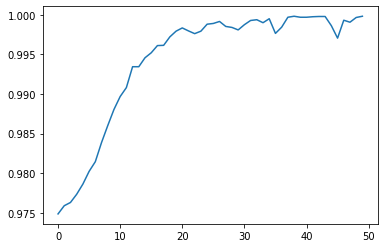

In [39]:
#history0 = history0b
#history0.history
# plot metrics
test = False
if test:
    _ = plt.plot(history0.history['msle'])
    _ = plt.plot(history0.history['mean_squared_error'])
    _ = plt.plot(history0.history['binary_accuracy'])
    _ = plt.plot(history0.history['categorical_accuracy'])
_ = plt.plot(history0.history['accuracy'])
_ = plt.show()

### Figures

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


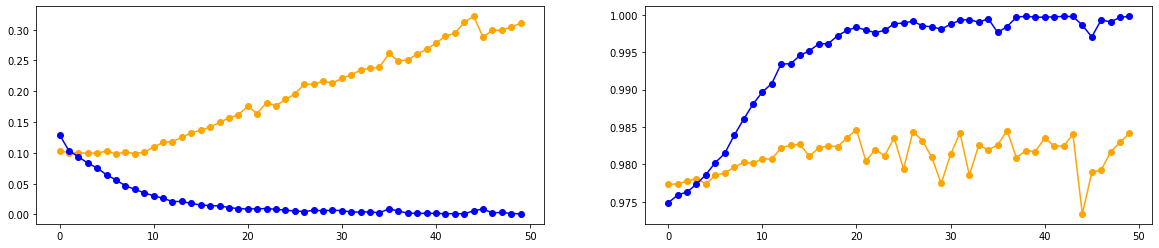

In [46]:
print(history0.history.keys())
#coul = ["blue", "lightblue", "orange", "red"]
coul = ["orange", "orange", "blue", "blue"]

fig = plt.figure(figsize=(20,4))
_ = plt.subplot(1,2,1)
for i in range(0,4,2):
    _ = plt.plot(list(history0.history.values())[i],'k-o', color=coul[i])
_ = plt.subplot(1,2,2)
for j in range(1,4,2):
    _ = plt.plot(list(history0.history.values())[j],'k-o', color=coul[j])

In [42]:
print(history0.history.keys())
print(history0.history['val_accuracy'][-1])
print(history0.history['accuracy'][-1])
print(history0.history['val_loss'][-1])
print(history0.history['loss'][-1])


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])
0.9841421246528625
0.99981177
0.3100479723542455
0.0009439984665172922


Test loss: 0.3331248938737443
Test accuracy: 0.9815064072608948
[0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


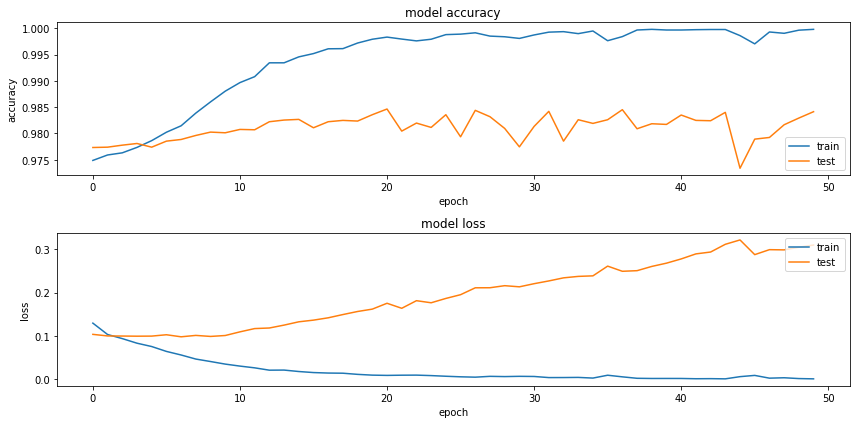

In [43]:
# RESULTATS
score = model0.evaluate(test_data2, test_labels, verbose=0, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# predictions
classes = model0.predict(test_data2, batch_size=batch_size)
predictions = model0.predict(test_data2[:10])
print(np.argmax(predictions, axis=1))
print(test_labels[:10,1])

# PLOTS
fig = plt.figure(figsize=(12,6))
_ = plt.subplot(2,1,1)
_ = plt.plot(history0.history['accuracy'])
_ = plt.plot(history0.history['val_accuracy'])
_ = plt.title('model accuracy')
_ = plt.xlabel('epoch')
_ = plt.ylabel('accuracy')
_ = plt.legend(['train','test'], loc='lower right')

_ = plt.subplot(2,1,2)
_ = plt.plot(history0.history['loss'])
_ = plt.plot(history0.history['val_loss'])
_ = plt.title('model loss')
_ = plt.xlabel('epoch')
_ = plt.ylabel('loss')
_ = plt.legend(['train','test'], loc='upper right')

_ = plt.tight_layout()
_ = fig

### Matrice de Confusion


 Echantillon Test: 5948
[[5765   68]
 [  42   73]]

 Echantillon Train: 23788
[[23176    80]
 [   49   483]]

 Normalisé:
Prédit       0.0       1.0
Reel                      
0.0     0.992767  0.297872
1.0     0.011710  0.517730

 testing1:
Predit   0.0  1.0   All
Reel                   
0.0     5765   42  5807
1.0       68   73   141
All     5833  115  5948


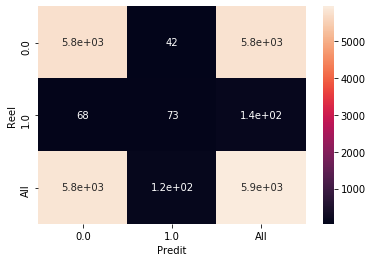


 testing2:
Predit       0.0       1.0  All
Reel                           
0.0     0.496384  0.003616  0.5
1.0     0.241135  0.258865  0.5
All     0.490333  0.009667  0.5


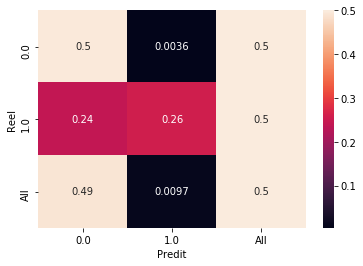

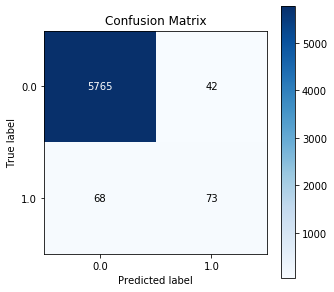

In [47]:
from sklearn.metrics import confusion_matrix

# transforme les matrice en listes d'entiers binaires (0 ou 1)
Y11 = pd.DataFrame(model0.predict(test_data2)[:,1:])[0].round(0).tolist()
Y10 = pd.DataFrame(test_labels[:,1:])[0].tolist()
print("\n Echantillon Test:", len(Y11))
print(confusion_matrix(Y11, Y10))

Y01 = pd.DataFrame(model0.predict(train_data2)[:,1:])[0].round(0).tolist()
Y00 = pd.DataFrame(train_labels[:,1:])[0].tolist()
print("\n Echantillon Train:", len(Y01))
print(confusion_matrix(Y01, Y00))

y_reel = pd.Series(Y10, name='Reel')
y_pred = pd.Series(Y11, name='Prédit')

df_confusion = pd.crosstab(y_reel, y_pred)

df_conf_norm = df_confusion / df_confusion.sum(axis=1)
print("\n Normalisé:")
print(df_conf_norm)
print("\n testing1:")
df_confusion = pd.crosstab(y_reel, y_pred, rownames=['Reel'], colnames=['Predit'], margins=True)
print(df_confusion)
_ = sns.heatmap(df_confusion, annot=True)
plt.show()

df_conf_norm = df_confusion.div(df_confusion.sum(axis=1), axis=0)
print("\n testing2:")
print(df_conf_norm)
_ = sns.heatmap(df_conf_norm, annot=True)
plt.show()

######### NOT WORKING ???
#from pandas_ml import ConfusionMatrix
#confusion_matrix = ConfusionMatrix(y_reel, y_pred)
#confusion_matrix.plot()
#plt.show()
#confusion_matrix.plot(normalized=True)
#plt.show()

#binary_confusion_matrix = ConfusionMatrix(y_true, y_pred)
#print("Binary confusion matrix:\n%s" % binary_confusion_matrix)
#print(binary_confusion_matrix.TP) # TN, FP, FN, ...
#binary_confusion_matrix.plot(normalized=False)
#binary_confusion_matrix.plot(normalized=True, backend='seaborn')
#plt.show()
#confusion_matrix.print_stats()
#confusion_matrix.stats()
##########


skplt.metrics.plot_confusion_matrix(y_reel, y_pred, figsize=(5,5))

(5948, 4) (23788, 4)
(5807, 4) (141, 4) (23225, 4) (563, 4)

 ERREURS: 0_true     0.0
0_pred     0.0
0_pred2    0.0
diff       0.0
dtype: float64 0_true      0.000000
0_pred     35.571707
0_pred2    42.000000
diff      -42.000000
dtype: float64 0_true     0.0
0_pred     0.0
0_pred2    0.0
diff       0.0
dtype: float64 0_true      0.000000
0_pred     12.392503
0_pred2     0.000000
diff        0.000000
dtype: float64

 LOSS 0.018493611297915265


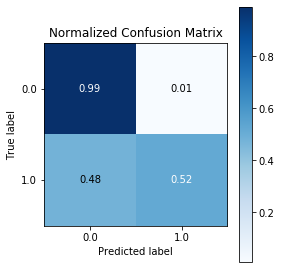

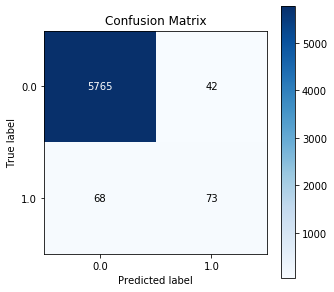

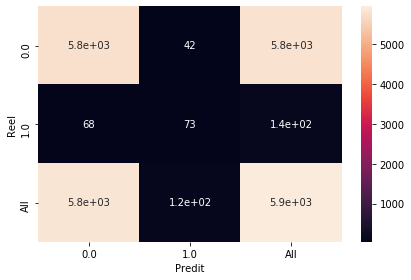

In [45]:
def mse_loss(y_true, y_pred):
    # y_true and y_pred are numpy arrays of the same length.
    return ((y_true - y_pred) ** 2).mean()

def tab_result(df_a, df_b):
    # Extrait les matrices binaires en 1 seule colonne
    y_pred = pd.DataFrame(model0.predict(df_b)[:,1:])
    y_true = pd.DataFrame(df_a[:,1:])
    # création de la table
    dy = y_true.merge(y_pred, left_index=True, right_index=True, suffixes=('_true', '_pred'))
    dy['0_true'] = dy['0_true'].astype(int)
    dy['0_pred2'] = dy['0_pred'].round(0)   #arrondi à l'entier le + proche
    dy['diff'] = dy['0_true'] - dy['0_pred2']
    return dy

def lampe_results(df1, df2):
    df_10 = df1[df1['0_true'] == 0]
    df_11 = dy1[dy1['0_true'] == 1]
    df_20 = df2[df2['0_true'] == 0]
    df_21 = dy2[dy2['0_true'] == 1]
    return (df_10, df_11, df_20, df_21)

dy1 = tab_result(test_labels, test_data2)
dy2 = tab_result(train_labels, train_data2)
dy1.head(2)
dy2.head(2)
df_test_1, df_test_0, df_train_1, df_train_0 = lampe_results(dy1, dy2)

print(dy1.shape, dy2.shape)
print(df_test_1.shape, df_test_0.shape, df_train_1.shape, df_train_0.shape)
#print(df_test_0.describe())
true_pos1 = df_test_1[(df_test_1['0_pred2'] == 1) & (df_test_1['0_true'] == 1)].sum()
fals_pos1 = df_test_1[(df_test_1['0_pred2'] == 1) & (df_test_1['0_true'] == 0)].sum()
fals_neg1 = df_test_1[(df_test_1['0_pred2'] == 0) & (df_test_1['0_true'] == 1)].sum()
true_neg1 = df_test_1[(df_test_1['0_pred2'] == 0) & (df_test_1['0_true'] == 0)].sum()
print("\n ERREURS:", true_pos1, fals_pos1, fals_neg1, true_neg1)
#####################################
# sensitivity-recall : TPR = TP/P = TP / (TP + FN)
# specificity-select : TNR = TN/N = TN / (TN + FP)
# balance : = (TPR + TNR) / 2
# precision          : TP / (TP + FP)

# accuracy    : ACC = (TP + TN) / total
# FI score    :  2 * TP / (2 TP + FP + FN) == 2 / (1/precision + 1/recall)
#####################################


# calcul pour LOSS du Mean Squared Error
print("\n LOSS", mse_loss(y_reel, y_pred))

######################################################################
#### Essai pour obtenir une belle matrice de confusion 
#cm_fig = interp.plot_confusion_matrix(return_fig=True)
#ax = cm_fig.gca()
#ax.set_ylim(interp.data.c - .5, - .5)
######################################################################

_ = skplt.metrics.plot_confusion_matrix(y_reel, y_pred, figsize=(4,4), normalize=True)
plt.tight_layout()
plt.show()
_ = skplt.metrics.plot_confusion_matrix(y_reel, y_pred, figsize=(5,5))
plt.show()

confusion_matrix(dy1['0_true'], dy1['0_pred2'])
sns.heatmap(df_confusion, annot=True)
plt.tight_layout()
plt.show()



y_true2 = [x for x in test_labels if x != 0]
y_pred2 = model0.predict(test_data)
print(len(y_true2), len(y_pred2))
print(mse_loss(y_true2, y_pred2))

egaux = [(a,b) for a in np.ndarray.tolist(y_true2) for b in np.ndarray.tolist(y_pred2) if a == b]
differents = [(a,b) for a in np.ndarray.tolist(y_true2) for b in np.ndarray.tolist(y_pred2) if a == b]
print(len(y_true2), len(egaux), len(differents))

from scipy import stats
stats.describe(y_true2)

# KERAS :  images bi-dimensionelles

### test séparation 

### tests

## Lecture des 3 fichiers de données

In [50]:
fichier1  = DATA_DIR3 + "data_LAS_nom_NUM_" + str(off) + "_" + str(mult) + ".npy"
data1     = np.load(fichier1)
fichier2  = DATA_DIR3 + "data_LAS_nom_ECA_" + str(off) + "_" + str(mult) + ".npy"
data2     = np.load(fichier2)
fichierY = DATA_DIR3 + "data_LAS_nom_POS_" + str(off) + "_" + str(mult) + ".npy"
data3    = np.load(fichierY)
#print(type(data1), type(data2))
print(data1.shape)
if (data1.shape[0] - data2.shape[0] != 0):
    print(data1.shape, data2.shape, data3.shape)

# concatenation de NUM et POS
data14 = tf.expand_dims(data1, 3)
data24 = tf.expand_dims(data2, 3)
data34 = tf.expand_dims(data1, 3)
print(data14.shape) #, data24.shape, data34.shape)

data_x = tf.concat([data14, data24], 3)
#data_x = tf.concat([data14, data24, data34], 3)
#data_x = data1
taille = data_x.shape[0]
print(data_x.shape, taille)
data_y   = np.load(fichierY).reshape(taille,100)
Nomb_Input = data_x.shape

print("\n Fichiers utilisés:\n", fichier1, "\n", fichier2, "\n", fichierY)
print("Classification utiliseé:\n", fichierY, "\n")
print(data_x.shape, data_y.shape)

(39592, 10, 10)
(39592, 10, 10, 1)
(39592, 10, 10, 2) 39592

 Fichiers utilisés:
 /Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/data_LAS_nom_NUM_29384_30.npy 
 /Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/data_LAS_nom_ECA_29384_30.npy 
 /Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/data_LAS_nom_POS_29384_30.npy
Classification utiliseé:
 /Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/data_LAS_nom_POS_29384_30.npy 

(39592, 10, 10, 2) (39592, 100)


In [51]:
# somme sur toutes les rangées ou colonnes   
# présence de valeurs SUPERIEURES A 1 (3 valeurs à 2 ! pourquoi ?????)
df_Y = pd.DataFrame(data_y)
df_Y['lamp'] = df_Y.sum(axis=1)
df_Y['lamp2'] = df_Y[:-1].sum(axis=0)
print(df_Y.shape, df_Y['lamp'].sum())
print(df_Y.shape[0], len(df_Y[df_Y['lamp'] == 0]), df_Y[df_Y['lamp'] == 1].shape[0], df_Y[df_Y['lamp'] > 1].shape[0])
#  Ecrase les valeurs de 2  ... pour avoir des 0 ou des 1
df_Y.loc[df_Y['lamp'] > 1] = 1
print(df_Y.shape[0], len(df_Y[df_Y['lamp'] == 0]), df_Y[df_Y['lamp'] == 1].shape[0], df_Y[df_Y['lamp'] > 1].shape[0])
#df_Y[df_Y['lamp'] == 2]

(39592, 102) 10620.0
39592 29062 10440 90
39592 29062 10530 0


In [52]:
# lampes0 autre DataFrame avec les indice de présence des lampadaires ... CORRECTS ? ... pas cohérent
df_tot = df_Y.merge(lampes0, left_index=True, right_index=True)
df_tot['diff'] = df_tot['present'] - df_tot['lamp']
print(df_tot.shape, lampes0.shape,df_Y.shape )

test = False
#test = True
if test:
    print(df_tot[df_tot['diff'] == 2].count(axis=0))
    print(df_tot[df_tot['diff'] == 1].count(axis=0))
    print(df_tot[df_tot['diff'] == 0].count(axis=0))
    print(df_tot[df_tot['diff'] == -1].count(axis=0))
    print(df_tot[df_tot['diff'] == -2].count(axis=0))
df_tot['diff'].describe()


(39592, 112) (40000, 9) (39592, 102)


count    39592.000000
mean        -0.257022
std          0.450655
min         -1.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: diff, dtype: float64

In [53]:
df_tot[df_tot['diff'] == -1]

,0,1,2,3,4,5,6,7,8,9,...,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS,diff
29032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,29032,32,145,2043225,7272160,2043225_7272160_NumPoints5m.tif,2043225_7272160_EcartZ5m.tif,2043225_7272160_Position5m.tif,-1.0
29033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,29033,33,145,2043225,7272165,2043225_7272165_NumPoints5m.tif,2043225_7272165_EcartZ5m.tif,2043225_7272165_Position5m.tif,-1.0
29034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,29034,34,145,2043225,7272170,2043225_7272170_NumPoints5m.tif,2043225_7272170_EcartZ5m.tif,2043225_7272170_Position5m.tif,-1.0
29035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,29035,35,145,2043225,7272175,2043225_7272175_NumPoints5m.tif,2043225_7272175_EcartZ5m.tif,2043225_7272175_Position5m.tif,-1.0
29036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,29036,36,145,2043225,7272180,2043225_7272180_NumPoints5m.tif,2043225_7272180_EcartZ5m.tif,2043225_7272180_Position5m.tif,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,39587,187,197,2043485,7272935,2043485_7272935_NumPoints5m.tif,2043485_7272935_EcartZ5m.tif,2043485_7272935_Position5m.tif,-1.0
39588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,39588,188,197,2043485,7272940,2043485_7272940_NumPoints5m.tif,2043485_7272940_EcartZ5m.tif,2043485_7272940_Position5m.tif,-1.0
39589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,39589,189,197,2043485,7272945,2043485_7272945_NumPoints5m.tif,2043485_7272945_EcartZ5m.tif,2043485_7272945_Position5m.tif,-1.0
39590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,39590,190,197,2043485,7272950,2043485_7272950_NumPoints5m.tif,2043485_7272950_EcartZ5m.tif,2043485_7272950_Position5m.tif,-1.0


In [54]:
df_Y.describe()

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,lamp,lamp2
count,39592.000000,39592.000000,39592.00000,39592.000000,39592.000000,39592.000000,39592.000000,39592.000000,39592.00000,39592.00000,...,39592.000000,39592.000000,39592.00000,39592.000000,39592.00000,39592.000000,39592.00000,39592.000000,39592.000000,190.000000
mean,0.007577,0.004546,0.00682,0.004546,0.002273,0.003031,0.003789,0.006062,0.00682,0.00682,...,0.005304,0.005304,0.00682,0.003789,0.00682,0.004546,0.00682,0.003031,0.265963,56.363158
std,0.086718,0.067274,0.08230,0.067274,0.047624,0.054971,0.061436,0.077622,0.08230,0.08230,...,0.072637,0.072637,0.08230,0.061436,0.08230,0.067274,0.08230,0.054971,0.441850,67.088268
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,30.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,90.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,...,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,240.000000


In [55]:
len0 = df_Y[df_Y['lamp'] == 0].shape[0]
len1 = df_Y.shape[0] - len0
print(len0, len1)

df_test = pd.DataFrame(y_binary)

test1 = df_test.loc[np.r_[:int(len0*0.8),len0:len0+int(len1*0.8)]]
test2 = df_test.loc[np.r_[int(len0*0.8):len0,len0+int(len1*0.8):len0+len1]]
                    
print(df_test.shape, len0, len0+int(len1*0.8), int(len0*0.8), int(len1*0.8), test1.shape, test2.shape)

29062 10530


KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [57]:
data_x0a = data_x[:int(len0*0.8)]
data_x0b = data_x[len0:len0+int(len1*0.8)]
data_x1a = data_x[int(len0*0.8):len0]
data_x1b = data_x[len0+int(len1*0.8):]
print(data_x0a.shape, data_x0b.shape,data_x1a.shape, data_x1b.shape)

#data_x0 = np.concatenate(data_x0a, data_x0b, axis=1)
data_x0 = tf.keras.backend.concatenate((data_x0a, data_x0b), axis=0)
data_x1 = tf.keras.backend.concatenate((data_x1a, data_x1b), axis=0)
print(data_x0.shape,data_x1.shape)

(23249, 10, 10, 2) (8424, 10, 10, 2) (5813, 10, 10, 2) (2106, 10, 10, 2)
(31673, 10, 10, 2) (7919, 10, 10, 2)


### Séparation Train - Test 

In [58]:

#########   problemes d'arrondis   ????  #######
#### pas le meme nombre de lignes pour les 2 manières différentes d'extraire les lignes  ????
df_testY = pd.DataFrame(y_binary)
y0 = df_testY.loc[np.r_[:int(len0*0.8),len0:len0+int(len1*0.8)],:]
y1 = df_testY.loc[np.r_[int(len0*0.8):len0,len0+int(len1*0.8):len0+len1],:]
print(y0.shape, y1.shape)

data_x0a = data_x[:int(len0*0.8)]
data_x0b = data_x[len0:len0+int(len1*0.8)]
data_x1a = data_x[int(len0*0.8):len0]
data_x1b = data_x[len0+int(len1*0.8):]
print(data_x0a.shape, data_x0b.shape,data_x1a.shape, data_x1b.shape)

#data_x0 = np.concatenate(data_x0a, data_x0b, axis=1)
data_x0 = tf.keras.backend.concatenate((data_x0a, data_x0b), axis=0)
data_x1 = tf.keras.backend.concatenate((data_x1a, data_x1b), axis=0)
print(data_x0.shape,data_x1.shape)

#X10, X11 = tf.split(X1, [:], 0)
#Y10, Y11 = tf.split(y_binary, [[len0 * 0.8:len0,len0+len1*0.8:]], 0)

#print(X10.shape, Y10.shape, X11.shape)

(31673, 2) (7919, 2)
(23249, 10, 10, 2) (8424, 10, 10, 2) (5813, 10, 10, 2) (2106, 10, 10, 2)
(31673, 10, 10, 2) (7919, 10, 10, 2)


In [59]:
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical

# Charge et split les données
###############   TODO      ###############
####### fonctionne avec les 2 cubes/images 
X = data_x
####### Si ne fonctionne pas avec les 2 cubes/images 
# X = data1
print("Dimensions X:", X.shape)
##############################################
#####   calcul de la position de la lampe dans le carré N
###  Passage mode binaire à une liste de 100
############
# Manière 1 de 
y = liste_y
# Manière 2 ... directe à partir des 3 mêmes fichiers 10x10
y = df_Y['lamp']

y_binary = to_categorical(y)
print("Dimensions Y:", y_binary.shape, len(y))
#
# y = data_y
# print(y.shape)
#############################

# tfds   tensorflow dataset splitting
# test_split, valid_split, train_split = tfds.Split.TRAIN.subsplit([10, 15, 75])
# PYTORCH   torchtext.data.Dataset
# split(split_ratio=0.7, stratified=False, strata_field='label', random_state=None

methode = 'test3'
#methode = 'SKLEARN'

if methode == 'test':
    all = tf.data.Dataset.from_tensor_slices(X).shuffle(10, reshuffle_each_iteration=False)
    n_row = int(X.shape[0] * 0.8)
    train_data, test_data     = X[:n_row,:,:,:], X[n_row:,:,:,:]
    train_labels, test_labels = y_binary[:n_row,:], y_binary[n_row:,:]
    
if methode == 'test2':
    len0 = df_Y[df_Y['lamp'] == 0].shape[0]
    len1 = df_Y.shape[0] - len0
    
    train_data, test_data = tf.split(X, [n_row1, n_row2], 0)
    train_labels, test_labels = tf.split(y_binary, [n_row1, n_row2], 0)
    
if methode == 'test3':
    train_data, test_data     = (data_x0, data_x1)
    train_labels, test_labels = (y0, y1)

if methode == 'shuffle':
    fraction = 20
    #all = tf.data.Dataset.from_tensor_slices(list(range(1, 21))).shuffle(10, reshuffle_each_iteration=False)
    #test_data = all.enumerate().filter(lambda x,y: x % int(100/fraction) == 0).map(lambda x,y: y)
    
# dim = len(keras.backend.int_shape(X))
# if dim = 2:
# Avec SKLEARN
if methode == 'SKLEARN':
    train_data, test_data, train_labels, test_labels = train_test_split(
        X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
#        X, y, test_size=0.2, random_state=42, stratify=y)

#print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)
print("Train et Test:", train_data.shape, len(train_labels), test_data.shape, len(test_labels))

#train_data = np.expand_dims(train_data, axis=3)
#test_data = np.expand_dims(test_data, axis=3)

#### Ce n'est plus nécessaire si X est un Tenseur 4D
#train_data = train_data.reshape(train_data.shape[0], 10, 10, 1)
#test_data  = test_data.reshape(test_data.shape[0], 10, 10, 1)

#print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)
print(train_data.shape, len(train_labels), test_data.shape, len(test_labels))
print(y0.shape, y0[:].shape, y1.shape)

Dimensions X: (39592, 10, 10, 2)
Dimensions Y: (39592, 2) 39592
Train et Test: (31673, 10, 10, 2) 31673 (7919, 10, 10, 2) 7919
(31673, 10, 10, 2) 31673 (7919, 10, 10, 2) 7919
(31673, 2) (31673, 2) (7919, 2)


In [60]:
#print(pd.DataFrame(train_labels).describe())
#print(pd.DataFrame(test_labels).describe())

## Modèles CNN 2D

In [70]:
print(train_data.shape, train_labels.shape,df_Y.shape, y_binary.shape, len(y))

# 2) Train CONVNET on the MNIST dataset
dim = len(keras.backend.int_shape(train_data))

epochs = 200   # 30 à 50 ou 120-150-200 ???
#  steps PROBLEMES si différent de 1 pour les derniers plots
batch_size = 1    # 64 
#ratio = 10 * 401 / 70
ratio = 10 * 20000 / 70
poids_class = {0: 1., 1: ratio}
if dim == 2:
    input_shape = (10, 10)
if dim == 4:
    input_shape = (10, 10, 2)
    #input_shape = (10, 10, 1)

filters = (5,5)
strides=(1,1)
pool_size=(2,2)

model2 = Sequential([
    Conv2D(6, filters, padding="same", strides=strides, input_shape=input_shape),
    MaxPooling2D(pool_size=pool_size),
    Conv2D(16, filters, padding="same", strides=strides),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense(120, activation='relu'),
    #Dropout(0.1),
    Dense(100, activation='relu'),
    #Dropout(0.1),
    Dense(2, activation='sigmoid')   #  'softmax'
    #Dense(2, activation='softmax')
])

#model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(),
#              metrics=['accuracy'])
model2.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adadelta(),
#model2.compile(loss=keras.losses.mse, optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#  si TENSOR = 2D
if dim == 2:
    history2 = model2.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, 
                          class_weight=poids_class,  # ou   'balanced'
          verbose=1, validation_data=(test_data, test_labels))
    score = model2.evaluate(test_data, test_labels, verbose=0)
elif dim == 4:
#    history2 = model2.fit_generator(train_data, train_labels, verbose=1)      
    history2 = model2.fit(train_data, train_labels, epochs=epochs, verbose=1, 
#                          # class_weight=poids_class,   #  ValueError:  NOT supported for 3+ dimensional targets
                        validation_freq=.33, steps_per_epoch=2)
    score = model2.evaluate(test_data, test_labels, steps=3, verbose=0)
else:
    print("WRONG tensor dimension inputs ....")

print('Test loss:', score[0])
print('Test accuracy:', score[1])

(31673, 10, 10, 2) (31673, 2) (39592, 102) (39592, 2) 39592
Epoch 1/200
2/2 [==============================] - 5s 2s/step - loss: 0.6819 - accuracy: 0.6116
Epoch 2/200
2/2 [==============================] - 4s 2s/step - loss: 0.6395 - accuracy: 0.7343
Epoch 3/200
2/2 [==============================] - 4s 2s/step - loss: 0.6261 - accuracy: 0.7347
Epoch 4/200
2/2 [==============================] - 4s 2s/step - loss: 0.6161 - accuracy: 0.7347
Epoch 5/200
2/2 [==============================] - 4s 2s/step - loss: 0.6062 - accuracy: 0.7350
Epoch 6/200
2/2 [==============================] - 4s 2s/step - loss: 0.5958 - accuracy: 0.7356
Epoch 7/200
2/2 [==============================] - 4s 2s/step - loss: 0.5842 - accuracy: 0.7367
Epoch 8/200
2/2 [==============================] - 4s 2s/step - loss: 0.5760 - accuracy: 0.7442
Epoch 9/200
2/2 [==============================] - 4s 2s/step - loss: 0.5837 - accuracy: 0.7505
Epoch 10/200
2/2 [==============================] - 4s 2s/step - loss: 0.576

2/2 [==============================] - 4s 2s/step - loss: 0.0309 - accuracy: 0.9930
Epoch 168/200
2/2 [==============================] - 4s 2s/step - loss: 0.0286 - accuracy: 0.9938
Epoch 169/200
2/2 [==============================] - 4s 2s/step - loss: 0.0263 - accuracy: 0.9945
Epoch 170/200
2/2 [==============================] - 4s 2s/step - loss: 0.0246 - accuracy: 0.9950
Epoch 171/200
2/2 [==============================] - 4s 2s/step - loss: 0.0234 - accuracy: 0.9952
Epoch 172/200
2/2 [==============================] - 4s 2s/step - loss: 0.0223 - accuracy: 0.9954
Epoch 173/200
2/2 [==============================] - 4s 2s/step - loss: 0.0213 - accuracy: 0.9957
Epoch 174/200
2/2 [==============================] - 4s 2s/step - loss: 0.0205 - accuracy: 0.9959
Epoch 175/200
2/2 [==============================] - 4s 2s/step - loss: 0.0200 - accuracy: 0.9959
Epoch 176/200
2/2 [==============================] - 5s 2s/step - loss: 0.0200 - accuracy: 0.9958
Epoch 177/200
2/2 [===============

### Sommaire

In [71]:
model2.summary()

# model.save_weights('file.h5')
# avec le model construit + les poids
# model.load_weights('file.h5')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 10, 10, 6)         306       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 6)           0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 16)          2416      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 120)               7800      
_________________________________________________________________
dense_11 (Dense)             (None, 100)              

### Figures

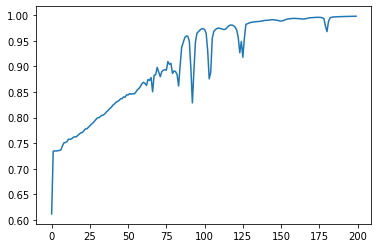

In [72]:
#history0.history
# plot metrics
#_ = plt.plot(history2.history['binary_accuracy'])
_ = plt.plot(history2.history['accuracy'])
_ = plt.show()

dict_keys(['loss', 'accuracy'])
0 blue [[0.6819430887699127, 0.6394827961921692, 0.6261390745639801, 0.6160750091075897, 0.6061840355396271, 0.5957554876804352, 0.5841845870018005, 0.5759539306163788, 0.5837472379207611, 0.5760313868522644, 0.5637467205524445, 0.5556609630584717, 0.5523943603038788, 0.5463096797466278, 0.5367429852485657, 0.5302055478096008, 0.526127427816391, 0.518409788608551, 0.5103355646133423, 0.5039563924074173, 0.49883922934532166, 0.49081578850746155, 0.4831932336091995, 0.47828398644924164, 0.4739181846380234, 0.46555013954639435, 0.4589335173368454, 0.4559975266456604, 0.4504075050354004, 0.4437256455421448, 0.43821635842323303, 0.4348433315753937, 0.42840205132961273, 0.4229418784379959, 0.41906265914440155, 0.41476184129714966, 0.4091492146253586, 0.40369659662246704, 0.3991330564022064, 0.394967719912529, 0.3913978934288025, 0.3851453959941864, 0.3808322846889496, 0.37606610357761383, 0.37356673181056976, 0.36721155047416687, 0.36525051295757294, 0.3572454

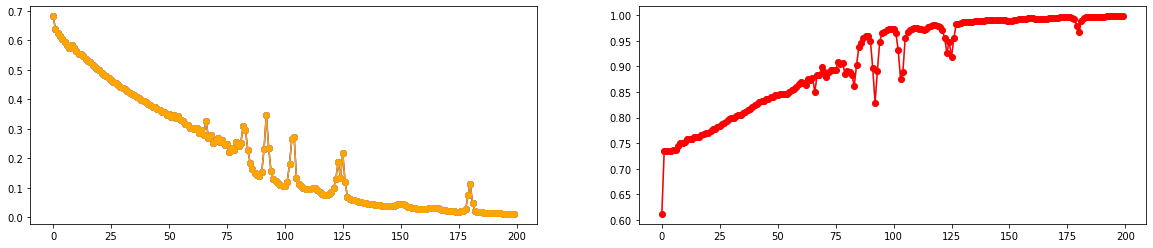

In [74]:
print(history2.history.keys())
coul = ["blue", "lightblue", "orange", "red"]

fig = plt.figure(figsize=(20,4))
_ = plt.subplot(1,2,1)
for i in range(0,4,2):
    print(i,coul[i], list(history2.history.values()))
    #_ = plt.plot(list(history2.history.values())[i],'k-o', color=coul[i])
    _ = plt.plot(list(history2.history.values())[0],'k-o', color=coul[i])
_ = plt.subplot(1,2,2)
for j in range(1,4,2):
    _ = plt.plot(list(history2.history.values())[1],'k-o', color=coul[j])

Test loss: 0.034108906984329224
Test accuracy: 0.9902133941650391
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(7919, 2) <class 'pandas.core.frame.DataFrame'>


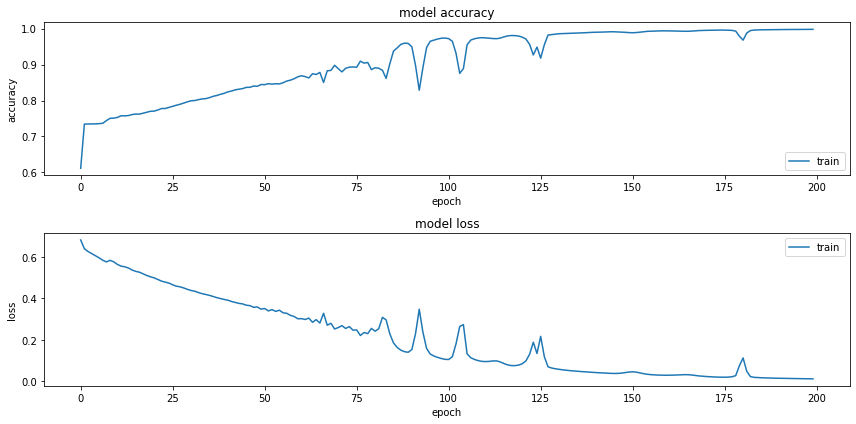

In [75]:
# RESULTATS

if dim == 2:
    score = model2.evaluate(test_data, test_labels, verbose=0, batch_size=batch_size)
    classes = model2.predict(test_data, batch_size=batch_size)
    predictions = model2.predict(test_data[:10])
if dim == 4:
    score = model2.evaluate(test_data, test_labels, verbose=0, steps=batch_size)
    classes = model2.predict(test_data, steps=batch_size)
    predictions = model2.predict(test_data[:100], steps=batch_size)
    
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# predictions
 #predictions = model2.predict_classes(test_data[:10])
print(np.argmax(predictions, axis=1))
print(test_labels.shape, type(test_labels))

######## TypeError: '(slice(None, 100, None), slice(0, 1, None))' is an invalid key
#print(test_labels[:100,0:1])

# PLOTS
fig = plt.figure(figsize=(12,6))
_ = plt.subplot(2,1,1)
_ = plt.plot(history2.history['accuracy'])
if dim == 2:
    _ = plt.plot(history2.history['val_accuracy'])
_ = plt.title('model accuracy')
_ = plt.xlabel('epoch')
_ = plt.ylabel('accuracy')
_ = plt.legend(['train','test'], loc='lower right')

_ = plt.subplot(2,1,2)
_ = plt.plot(history2.history['loss'])
if dim == 2:
    _ = plt.plot(history2.history['val_loss'])
_ = plt.title('model loss')
_ = plt.xlabel('epoch')
_ = plt.ylabel('loss')
_ = plt.legend(['train','test'], loc='upper right')

_ = plt.tight_layout()
_ = fig

### Matrice de confusion

In [77]:
print(data_x0.shape, y0[:].shape, y0[1:].shape)
y0[:]

(31673, 10, 10, 2) (31673, 2) (31672, 2)


,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
37481,0.0,1.0
37482,0.0,1.0
37483,0.0,1.0
37484,0.0,1.0


In [78]:
print(test_data.shape, test_labels[:].shape)

(7919, 10, 10, 2) (7918, 2)


start tensor 4D
Echantillon Train: (31673, 10, 10, 2) 31673 31673
Echantillon Test: 7919 7919
(31673,) (31673, 1) (7919,) (7919, 1)
SOMME réelle:  8401.0 2129.0
SOMME prédite: 8418.0 2194.0
Pourcentages:
Train: 100.2 %
Test: 103.05 %


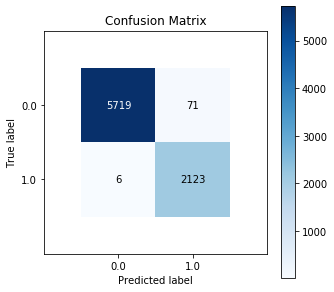

In [79]:
from sklearn.metrics import confusion_matrix
#       pip install scikit-plot
import scikitplot as skplt

# transforme les matrice en listes d'entiers binaires (0 ou 1)
if dim == 2:
    print("start matrice 2D")
    Y01 = pd.DataFrame(model2.predict(train_data, steps=batch_size)[:,1:])[0].round(0).tolist()
    Y11 = pd.DataFrame(model2.predict(test_data, steps=batch_size)[:,1:])[0].round(0).tolist()
    Y00 = pd.DataFrame(train_labels[:,1:])[0].tolist()
    Y10 = pd.DataFrame(test_labels[:,1:])[0].tolist()
    
if dim == 4:
    print("start tensor 4D")
    Y01 = model2.predict(train_data, steps=batch_size)[:].round(0).tolist()
    Y11 = model2.predict(test_data, steps=batch_size)[:].round(0).tolist()
    Y00 = train_labels[:]
    Y10 = test_labels[:]
#    Y10 = test_labels[1:].numpy().tolist()

print("Echantillon Train:", train_data.shape, len(Y00), len(Y01))
#confusion_matrix(Y01, Y00)

print("Echantillon Test:", len(Y10), len(Y11))
#confusion_matrix(Y11, Y10)
if dim == 2:
    y_reel = pd.Series(Y10, name='Reel_test')
    y_pred = pd.Series(Y11, name='Prédit_test')
if dim == 4:
#    y_reel = test_labels[1:].numpy()
    y_reel0 = train_labels[1]
    y_pred0 = model2.predict(train_data, steps=batch_size).round(0)[:,1:]
    y_reel = test_labels[1]
    y_pred = model2.predict(test_data, steps=batch_size).round(0)[:,1:]

if dim == 2:
   #df_confusion = pd.crosstab(y_reel, y_pred, rownames=['Reel_test'], colnames=['Predit_test'], margins=True)
   print("\n", df_confusion)

print(y_reel0.shape, y_pred0.shape, y_reel.shape, y_pred.shape,)
print("SOMME réelle: ", y_reel0.sum(), y_reel.sum())
print("SOMME prédite:", y_pred0.sum(), y_pred.sum())

print("Pourcentages:")
print("Train:", round(y_pred0.sum() / y_reel0.sum()* 100, 2),"%")
print("Test:", round(y_pred.sum() / y_reel.sum()* 100, 2),"%")
#
##################
#fig, ax = matplotlib.pyplot.subplots(1)
#ax.set_yticks([0, 1])
#ax.set_yticklabels(["0", "1"])
##################
#scikitplot.metrics.plot_confusion_matrix(
#y_true, y_pred, labels=None, true_labels=None, pred_labels=None, 
#title=None, normalize=False, hide_zeros=False, hide_counts=False, 
#x_tick_rotation=0, ax=None, figsize=None, cmap='Blues', 
#title_fontsize='large', text_fontsize='medium')
ax = skplt.metrics.plot_confusion_matrix(y_reel, y_pred,
            figsize=(5,5), hide_counts=False )

ax.set(xlim=(-1, 2), ylim=(2, -1))
#ax.set(xlim=(0, 1), ylim=(1,0))
#ax.set_yticks([0, 1])
#print("AXES:", ax)
plt.show()
#
#df_conf_norm = df_confusion / df_confusion.sum(axis=1)
#print("\n", df_conf_norm)
#df_conf_norm = df_confusion.div(df_confusion.sum(axis=1), axis=0)
#print("\n", df_conf_norm)

#skplt.metrics.plot_roc(y_test, y_pred)
#plt.show()
#_ = sns.heatmap(df_confusion, annot=True)
#plt.show()
#_ = sns.heatmap(df_conf_norm, annot=True)
#plt.show()

In [80]:
#print(y_reel)
print(y_reel0.shape, y_pred0.shape, y_reel.shape, y_pred.shape,)
print("SOMME réelle: ", y_reel0.sum(), y_reel.sum())
print("SOMME prédite:", y_pred0.sum(), y_pred.sum())

print("Pourcentages:")
print("Train:", round(y_pred0.sum() / y_reel0.sum()* 100, 2),"%")
print("Test:", round(y_pred.sum() / y_reel.sum()* 100, 2),"%")

df_res0 = pd.DataFrame(y_reel0).reset_index().rename(columns={1: "reel"})
df_res0['pred'] = pd.DataFrame(y_pred0)
df_res0['diff'] = df_res0['pred'] - df_res0['reel']
val0_00 = len(df_res0[(df_res0['pred'] == 0) & (df_res0['reel'] == 0)])
val0_01 = len(df_res0[(df_res0['pred'] == 0) & (df_res0['reel'] == 1)])
val0_10 = len(df_res0[(df_res0['pred'] == 1) & (df_res0['reel'] == 0)])
val0_11 = len(df_res0[(df_res0['pred'] == 1) & (df_res0['reel'] == 1)])

print("\n Pourcentages:")
print('Valeurs:', val0_00, val0_01, val0_10, val0_11)
print("Train 0:", round(val0_00 / (val0_00+val0_10)* 100, 2),"%")
print("Train 1: ", round(val0_11 / (val0_01+val0_11)* 100, 2),"%")

df_res = pd.DataFrame(y_reel).reset_index().rename(columns={1: "reel"})
df_res['pred'] = pd.DataFrame(y_pred)
df_res['diff'] = df_res['pred'] - df_res['reel']
val_00 = len(df_res[(df_res['pred'] == 0) & (df_res['reel'] == 0)])
val_01 = len(df_res[(df_res['pred'] == 0) & (df_res['reel'] == 1)])
val_10 = len(df_res[(df_res['pred'] == 1) & (df_res['reel'] == 0)])
val_11 = len(df_res[(df_res['pred'] == 1) & (df_res['reel'] == 1)])

print("Pourcentages:")
print('Valeurs:', val_00, val_01, val_10, val_11)
print("Test 0:", round(val_00 / (val_00+val_10)* 100, 2),"%")
print("Test 1: ", round(val_11 / (val_01+val_11)* 100, 2),"%")

(31673,) (31673, 1) (7919,) (7919, 1)
SOMME réelle:  8401.0 2129.0
SOMME prédite: 8418.0 2194.0
Pourcentages:
Train: 100.2 %
Test: 103.05 %

 Pourcentages:
Valeurs: 23231 24 41 8377
Train 0: 99.82 %
Train 1:  99.71 %
Pourcentages:
Valeurs: 5719 6 71 2123
Test 0: 98.77 %
Test 1:  99.72 %


# KERAS hyperparametres

In [301]:
from sklearn.model_selection import GridSearchCV

from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

def create_model(neurons=1, optimizer='adam', dropout_rate=0.0, learn_rate=0.01, momentum=0, 
                 init_mode='uniform', activation='relu', dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Dense(neurons, kernel_initializer=init_mode, input_dim=8, activation=activation)'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 42
numpy.random.seed(seed)
# load dataset

dataset = 
# split into input (X) and output (Y) variables
X = dataset
Y = dataset

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, dropout_rate=0.2, verbose=0)

              
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
weight_constraint = [i for i in range (1, 6, 1)]
dropout_rate = [i/10 for i in range (0, 10, 1)]
neurons = [1, 5, 10, 15, 20, 25, 30]

param_grid = dict(neurons=neurons, learn_rate=learn_rate, momentum=momentum, optimizer=optimizer, 
                init_mode=init_mode, batch_size=batch_size, epochs=epochs, activation=activation,
                dropout_rate=dropout_rate, weight_constraint=weight_constraint)
#  score = ???
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)   # n_jobs=-1  parallisation
grid_result = grid.fit(X, Y)

# summarize results ==>  best_score et best_params_
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

SyntaxError: invalid syntax (<ipython-input-301-ded477e1019e>, line 19)